<a href="https://colab.research.google.com/github/Hehs33/TareasAprendizaje_PUCE/blob/main/2-Ejercicios/06_SVM_TomasHidrobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1nhcmymILHmCtHCwHZWFuH5AOE16EQTZO#scrollTo=4Arwq8B0SoWz" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Tomas Hidrobo &bull; 2026-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [ ]:
# Paquetes necesarios
import io
from google.colab import files

import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np  # Operaciones numéricas

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay)

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
df_raw = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Archivo:", filename)
df = df_raw.copy()

print("Archivo cargado:", filename)
print("Dimensiones (filas, columnas):", df.shape)

print("\nPrimeras 10 filas:")
display(df.head(10))

print("\nDescripción (variables numéricas)")
display(df.describe().T)

print("\nDescripción (variables categóricas)")
display(df.describe(include="object").T)

Saving premier_league_cleaned.csv to premier_league_cleaned.csv
Archivo: premier_league_cleaned.csv
Archivo cargado: premier_league_cleaned.csv
Dimensiones (filas, columnas): (1049, 15)

Primeras 10 filas:


,Matchday,Date,Time,Home Team,homeScore,homeXG,awayScore,awayXG,Away Team,Attendance,Referee,Stadium,Result,*Additional Stats,Attendance_cap
0,1,2022-08-05,20:00:00,Crystal Palace,0,1.2,2,1.0,Arsenal,25286.0,Anthony Taylor,Selhurst Park,A,https://fbref.com//en/matches/e62f6e78/Crystal...,25286.0
1,1,2022-08-06,12:30:00,Fulham,2,1.2,2,1.2,Liverpool,22207.0,Andy Madley,Craven Cottage,D,https://fbref.com//en/matches/6713c1dc/Fulham-...,22508.5
2,1,2022-08-06,15:00:00,Tottenham,4,1.5,1,0.5,Southampton,61732.0,Andre Marriner,Tottenham Hotspur Stadium,H,https://fbref.com//en/matches/09d8a999/Tottenh...,61732.0
3,1,2022-08-06,15:00:00,Newcastle Utd,2,1.7,0,0.3,Nott'ham Forest,52245.0,Simon Hooper,St James' Park,H,https://fbref.com//en/matches/1ac96eb4/Newcast...,52245.0
4,1,2022-08-06,15:00:00,Leeds United,2,0.8,1,1.3,Wolves,36347.0,Robert Jones,Elland Road,H,https://fbref.com//en/matches/82702941/Leeds-U...,36347.0
5,1,2022-08-06,15:00:00,Bournemouth,2,0.6,0,0.7,Aston Villa,11013.0,Peter Bankes,Vitality Stadium,H,https://fbref.com//en/matches/877e3193/Bournem...,11013.0
6,1,2022-08-06,17:30:00,Everton,0,0.7,1,1.5,Chelsea,39254.0,Craig Pawson,Goodison Park,A,https://fbref.com//en/matches/3a917cee/Everton...,39254.0
7,1,2022-08-07,14:00:00,Leicester City,2,0.6,2,0.8,Brentford,31794.0,Jarred Gillett,King Power Stadium,D,https://fbref.com//en/matches/3249ba27/Leicest...,31794.0
8,1,2022-08-07,14:00:00,Manchester Utd,1,1.4,2,1.5,Brighton,73711.0,Paul Tierney,Old Trafford,A,https://fbref.com//en/matches/8251694e/Manches...,73711.0
9,1,2022-08-07,16:30:00,West Ham,0,0.5,2,2.2,Manchester City,62443.0,Michael Oliver,London Stadium,A,https://fbref.com//en/matches/ece62baf/West-Ha...,62443.0



Descripción (variables numéricas)


,count,mean,std,min,25%,50%,75%,max
Matchday,1049.0,18.246902,10.512853,1.0,9.0,18.0,27.0,38.0
homeScore,1049.0,1.660629,1.364484,0.0,1.0,1.0,2.0,9.0
homeXG,1049.0,1.626787,0.878962,0.0,1.0,1.5,2.2,7.0
awayScore,1049.0,1.383222,1.237897,0.0,0.0,1.0,2.0,8.0
awayXG,1049.0,1.316206,0.781492,0.0,0.8,1.2,1.7,5.6
Attendance,1049.0,39713.988084,17042.474631,9972.0,28997.0,38198.0,53306.0,75546.0
Attendance_cap,1049.0,39687.196735,17035.829814,9972.0,29116.0,36955.0,53306.0,74081.5



Descripción (variables categóricas)


,count,unique,top,freq
Date,1049,317,2024-05-19,10
Time,1049,21,15:00:00,384
Home Team,1049,24,Crystal Palace,53
Away Team,1049,24,Arsenal,53
Referee,1049,29,Anthony Taylor,82
Stadium,1049,27,Selhurst Park,53
Result,1049,3,H,473
*Additional Stats,1049,1049,https://fbref.com//en/matches/7bab156e/Leicest...,1


In [ ]:
df = df_raw.copy()

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Hour"] = pd.to_numeric(df["Time"].astype(str).str.slice(0, 2), errors="coerce")

df = df.dropna(subset=["Date", "Hour"]).copy()
df["Hour"] = df["Hour"].astype(int)

df["Month"] = df["Date"].dt.month
df["DayOfWeek"] = df["Date"].dt.dayofweek

total_goals = df["homeScore"] + df["awayScore"]
y = (total_goals >= 3).astype(int)

X_base = df[["Matchday", "Month", "DayOfWeek", "Hour", "Home Team", "Away Team"]].copy()
X = pd.get_dummies(X_base, columns=["Home Team", "Away Team"], drop_first=False)

bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

print("df final shape:", df.shape)
print("X shape:", X.shape)
print("Distribución y:", y.value_counts().to_dict())
display(X.head(10))


df final shape: (1049, 18)
X shape: (1049, 52)
Distribución y: {1: 615, 0: 434}


,Matchday,Month,DayOfWeek,Hour,Home Team_Arsenal,Home Team_Aston Villa,Home Team_Bournemouth,Home Team_Brentford,Home Team_Brighton,Home Team_Burnley,...,Away Team_Luton Town,Away Team_Manchester City,Away Team_Manchester Utd,Away Team_Newcastle Utd,Away Team_Nott'ham Forest,Away Team_Sheffield Utd,Away Team_Southampton,Away Team_Tottenham,Away Team_West Ham,Away Team_Wolves
0,1,8,4,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,8,5,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,8,5,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,8,5,15,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,8,5,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,8,6,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,8,6,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0



### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


In [ ]:
# Separamos el modelo en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values, test_size=0.2, random_state=99, stratify=y.values
)

# Escalado
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

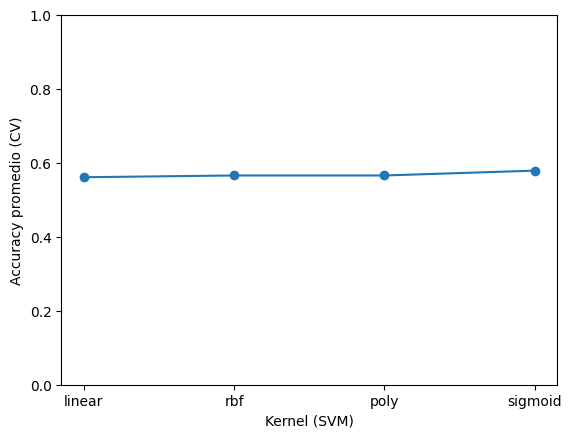

In [ ]:
kernels = ["linear", "rbf", "poly", "sigmoid"]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)

mean_acc = []
std_acc = []

for k in kernels:
    clf = SVC(kernel=k, C=1.0)
    scores = cross_val_score(clf, X_train_s, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())

plt.figure()
plt.plot(kernels, mean_acc, marker="o")
plt.xlabel("Kernel (SVM)")
plt.ylabel("Accuracy promedio (CV)")
plt.ylim(0, 1)
plt.show()

Para saber que kernel es el mejor, hay que escoger el punto mas alto de las 4 opciones, en este caso no se diferencia tanto pero en sigmoid la el punto esta un poco mas alto que el resto.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

SVM kernel: sigmoid
Accuracy (test): 0.6143

Reporte de clasificación:
              precision    recall  f1-score   support

Under2.5 (0)       0.59      0.22      0.32        87
 Over2.5 (1)       0.62      0.89      0.73       123

    accuracy                           0.61       210
   macro avg       0.61      0.56      0.53       210
weighted avg       0.61      0.61      0.56       210



<Figure size 640x480 with 0 Axes>

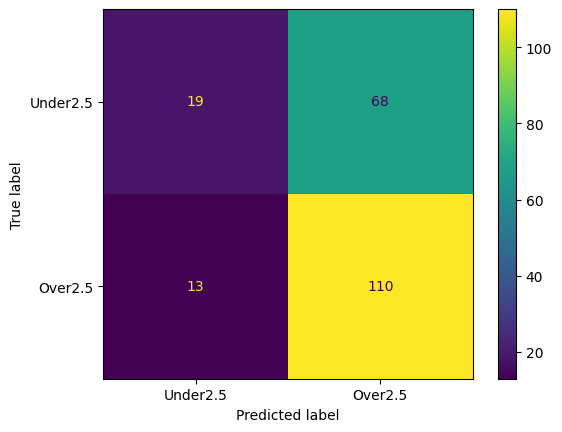

In [ ]:
svm_sigmoid = SVC(kernel="sigmoid", C=1.0, random_state=99)
svm_sigmoid.fit(X_train_s, y_train)

y_pred = svm_sigmoid.predict(X_test_s)

# Métricas
print("SVM kernel: sigmoid")
print("Accuracy (test):", round(accuracy_score(y_test, y_pred), 4))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Under2.5 (0)", "Over2.5 (1)"]))

# Matriz de confusion
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Under2.5", "Over2.5"])
plt.figure()
disp.plot()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

**kNN (k=49) — Test**
- Accuracy: 0.5905
- Under2.5 (0): precision=0.52, recall=0.16, f1=0.25 (support=87)
- Over2.5 (1):  precision=0.60, recall=0.89, f1=0.72 (support=123)
- Macro avg:    precision=0.56, recall=0.53, f1=0.48
- Weighted avg: precision=0.57, recall=0.59, f1=0.52
- Confusion matrix (True x Pred): [[14, 73], [13, 110]]

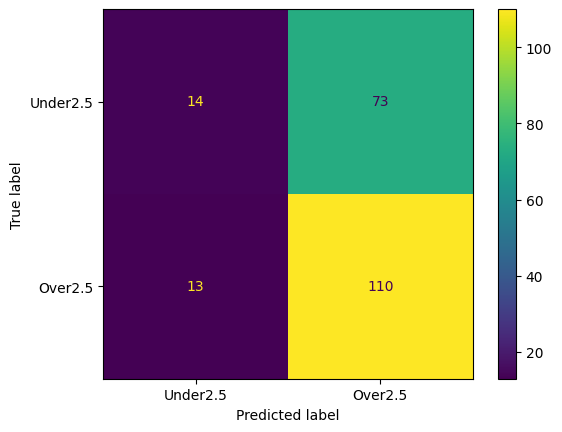

**SVM (kernel=sigmoid) — Test**
- Accuracy: 0.6143
- Under2.5 (0): precision=0.59, recall=0.22, f1=0.32 (support=87)
- Over2.5 (1):  precision=0.62, recall=0.89, f1=0.73 (support=123)
- Macro avg:    precision=0.61, recall=0.56, f1=0.53
- Weighted avg: precision=0.61, recall=0.61, f1=0.56
- Confusion matrix (True x Pred): [[19, 68], [13, 110]]

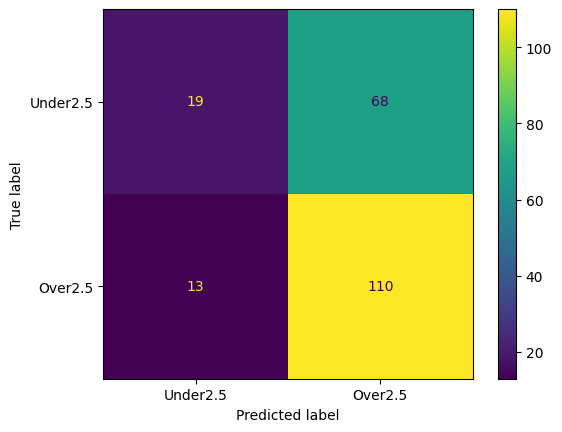

Ambos modelos tienden a clasificar de mejor manera las variables Over 2.5 pero basandonos en precision, recall y f1, SVM es mejor detectando en Under 2.5 y en Over 2.5.

Basandonos en las graficas, SVM igual es mejor ya que acierta 68 y se equivoca 73 de 87 partidos, en cambio usando la misma cantidad de partidos KNN solo acierta 14 y se equivoca en 73.

Las diferencias no son tan notables y tienen casi los mismos resultados pero viendo los resultados SVM es mejor detectando los Uder 2.5 que KNN,